In [3]:
import parse
import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn import datasets, linear_model
# Display plots inline and change default figure size
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [4]:
var_names, data, labels = parse.start() # get the data

[  1.25088590e-01   1.73281361e-01   8.61091425e-02   3.82707300e-02
   1.16052445e-01   1.29695252e-01   2.42558469e-01   1.52197023e-01
   0.00000000e+00   1.50779589e-01   1.60524451e-01   1.76824947e-01
   1.30581148e-01   0.00000000e+00   1.29872431e-01   0.00000000e+00
   1.02409639e-01   0.00000000e+00   1.14457831e-01   8.92983700e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   1.48830617e-01
   3.33097094e-02   0.00000000e+00   4.14599575e-02   2.15804394e-01
   2.26257973e-01   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   1.80368533e-01   2.04287739e-01   0.00000000e+00
   0.00000000e+00   2.14918498e-01   1.29518072e-01   0.00000000e+00
   1.13926293e-01   1.71332388e-01   1.32352941e-01   4.96102055e-02
   3.17150957e-02   8.07937633e-02   2.39369242e-01   4.25230333e-03
   0.00000000e+00   1.35187810e-01   3.22466336e-02   0.00000000e+00
   1.84266478e-02   3.20694543e-01   6.80368533e-02   8.68178597e-02
   1.14989369e-01   0.00000000e+00

In [5]:
data, labels = np.array(data), np.array(labels)

In [17]:
reg = linear_model.LinearRegression()
train_data = data[:int(data.shape[0]*0.8),:]
train_labels = labels[:int(labels.shape[0]*.8)]
test_data = data[int(data.shape[0]*.8):,:]
test_labels = labels[int(data.shape[0]*.8):]
print train_data.shape
print train_labels.shape
print test_data.shape
print test_labels.shape


(1168, 79)
(1168,)
(292, 79)
(292,)


In [37]:
# reg.fit(train_data, train_labels)
A = data
y = labels
coefficients = np.linalg.inv((A.T).dot(A)).dot(A.T).dot(y)
reg.coef_ = coefficients
reg.fit(train_data, train_labels)
# print coefficients
# coefficients = reg.coef_
print coefficients

[ -1.92201642e+03  -1.35533168e+05   6.90316896e+04   9.49060868e+05
  -4.10706952e+05  -3.40408865e+04   7.23255378e+03  -1.33110197e+05
   8.75975326e+03   1.31823440e+03   2.25548609e+05   1.37466802e+04
   3.71513251e+04   3.64335412e+05  -5.68408887e+03  -3.55122432e+04
   1.32515650e+05   1.28593324e+05  -3.53752192e+04   3.09422183e+04
   8.08112671e+02  -3.22301377e+04  -5.06243375e+03  -1.30644538e+03
   3.96021111e+03   3.19903177e+04   1.54831585e+04   1.32345895e+04
  -2.04872266e+04   7.73127514e+02  -2.60793150e+04  -7.00356323e+03
  -5.68651786e+04   5.58869237e+17  -3.44728100e+04   1.45955573e+17
   2.31310868e+17  -6.05012586e+17  -3.50747797e+04  -4.07834663e+03
  -7.38442479e+03  -7.64331701e+03  -1.46252208e+06  -3.30972488e+05
  -1.19479964e+05   1.41037979e+06   1.86639527e+04   3.92990180e+03
   1.28039718e+04   2.49924753e+03  -6.96623759e+04  -9.73607633e+04
   4.71260803e+02   4.38365104e+04  -6.96892322e+03   2.27692326e+04
  -8.54591772e+03   2.54035871e+03

In [34]:
predictions = reg.predict(test_data)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(test_labels[i])
squared_error = np.mean((predictions - test_labels)**2)
mse = squared_error
print "mean squared error: " + str(mse)
explained_variance = reg.score(test_data, test_labels)
print "explaiend variance: " + str(explained_variance)
e = sum(abs(predictions - test_labels))/float(len(test_labels))
print "the average prediction is off by " + str(e)



predicted price: 314712.746036, actual price: 381000
predicted price: 52880.7460356, actual price: 144000
predicted price: 44287.7460356, actual price: 260000
predicted price: -69727.2539644, actual price: 185750
predicted price: 16534.9748869, actual price: 137000
predicted price: -7815.25396442, actual price: 177000
predicted price: 25480.7460356, actual price: 139000
predicted price: 52616.7460356, actual price: 137000
predicted price: 141584.746036, actual price: 162000
predicted price: 51616.7460356, actual price: 197900
mean squared error: 33189311979.3
explaiend variance: -3.94966188993
the average prediction is off by 157138.505726


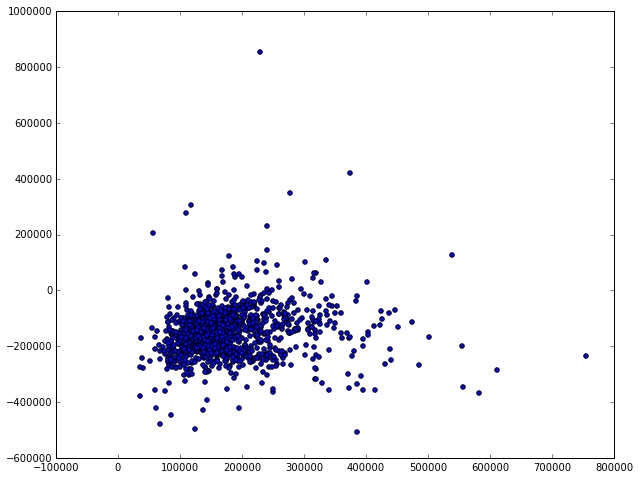

In [35]:
plt.scatter(train_labels, list(reg.predict(train_data)-train_labels))

In [13]:
ridge = linear_model.RidgeCV(alphas = [.5, .1, 1.0])
ridge.fit(train_data, train_labels)
print ridge.alpha_

1.0


In [14]:
predictions = ridge.predict(test_data)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(test_labels[i])
squared_error = np.mean((predictions - test_labels)**2)
mse = squared_error
print "mean squared error: " + str(mse)
explained_variance = reg.score(test_data, test_labels)
print "explaiend variance: " + str(explained_variance)
e = sum(abs(predictions - test_labels))/float(len(test_labels))
print "the average prediction is off by " + str(e)

predicted price: 364886.672485, actual price: 381000
predicted price: 127372.519809, actual price: 144000
predicted price: 235076.302192, actual price: 260000
predicted price: 162545.729494, actual price: 185750
predicted price: 111634.475827, actual price: 137000
predicted price: 176045.956503, actual price: 177000
predicted price: 131450.616059, actual price: 139000
predicted price: 156571.332276, actual price: 137000
predicted price: 156909.029162, actual price: 162000
predicted price: 200065.303945, actual price: 197900
mean squared error: 2290434734.42
explaiend variance: 0.56718553613
the average prediction is off by 23520.5746937


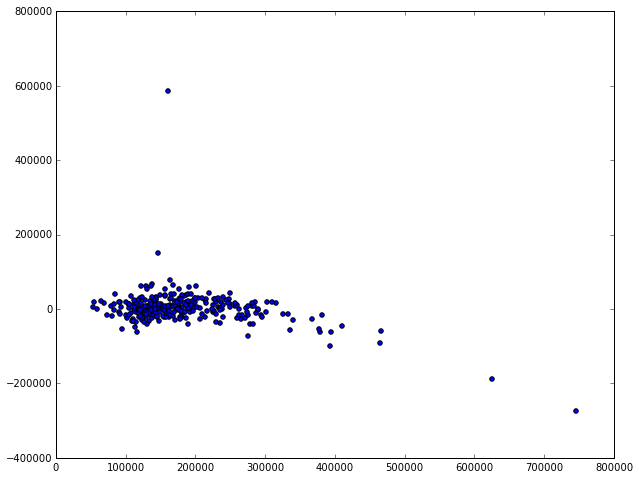

In [15]:
plt.scatter(test_labels, list(predictions-test_labels))

In [17]:
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(train_data, train_labels)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [18]:
predictions = lasso.predict(test_data)
for i in range(100,110):
    print "predicted price: " + str(predictions[i]) + ", actual price: " + str(test_labels[i])
squared_error = np.mean((predictions - test_labels)**2)
mse = squared_error
print "mean squared error: " + str(mse)
explained_variance = reg.score(test_data, test_labels)
print "explaiend variance: " + str(explained_variance)
e = sum(abs(predictions - test_labels))/float(len(test_labels))
print "the average prediction is off by " + str(e)

predicted price: 369996.720449, actual price: 381000
predicted price: 126331.968157, actual price: 144000
predicted price: 240057.174741, actual price: 260000
predicted price: 163370.950133, actual price: 185750
predicted price: 110968.314557, actual price: 137000
predicted price: 177034.325906, actual price: 177000
predicted price: 122110.421926, actual price: 139000
predicted price: 155313.996159, actual price: 137000
predicted price: 159779.183995, actual price: 162000
predicted price: 200784.299547, actual price: 197900
mean squared error: 2827398801.16
explaiend variance: 0.56718553613
the average prediction is off by 25584.8139178


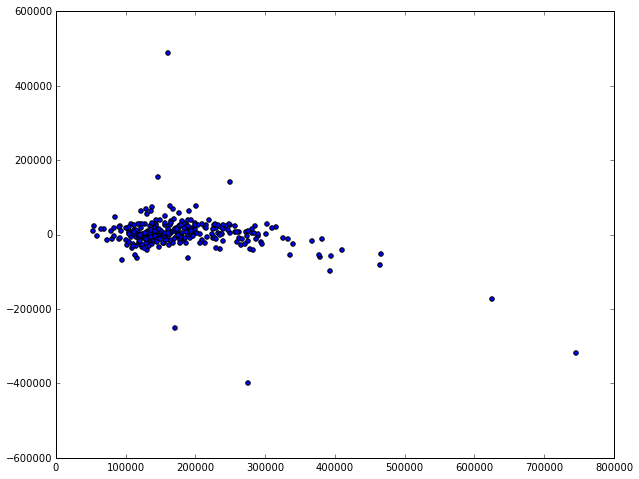

In [19]:
plt.scatter(test_labels,list((predictions-test_labels)))

In [16]:
A = data
y = labels
transpose_mult = (A.T).dot(A)
transpose_mult = np.linalg.inv(transpose_mult)
new_matrix = transpose_mult.dot(A.T)
coefficients = new_matrix.dot(y)
print coefficients

[ -1.92201642e+03  -1.35533168e+05   6.90316896e+04   9.49060868e+05
  -4.10706952e+05  -3.40408865e+04   7.23255378e+03  -1.33110197e+05
   8.75975326e+03   1.31823440e+03   2.25548609e+05   1.37466802e+04
   3.71513251e+04   3.64335412e+05  -5.68408887e+03  -3.55122432e+04
   1.32515650e+05   1.28593324e+05  -3.53752192e+04   3.09422183e+04
   8.08112671e+02  -3.22301377e+04  -5.06243375e+03  -1.30644538e+03
   3.96021111e+03   3.19903177e+04   1.54831585e+04   1.32345895e+04
  -2.04872266e+04   7.73127514e+02  -2.60793150e+04  -7.00356323e+03
  -5.68651786e+04   5.58869237e+17  -3.44728100e+04   1.45955573e+17
   2.31310868e+17  -6.05012586e+17  -3.50747797e+04  -4.07834663e+03
  -7.38442479e+03  -7.64331701e+03  -1.46252208e+06  -3.30972488e+05
  -1.19479964e+05   1.41037979e+06   1.86639527e+04   3.92990180e+03
   1.28039718e+04   2.49924753e+03  -6.96623759e+04  -9.73607633e+04
   4.71260803e+02   4.38365104e+04  -6.96892322e+03   2.27692326e+04
  -8.54591772e+03   2.54035871e+03